<a href="https://colab.research.google.com/github/hrmufid/Mini-Project-2/blob/main/Mini_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Investigate Hotel Business using Data Visualization**

# Import the necessary library

In [23]:
# import libraries
import pandas as pd
import scipy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# import shap
import warnings
warnings.filterwarnings('ignore')

In [24]:
# initialize random state
random_state = 42

# set plot style for whole notebook
sns.set_style('darkgrid')

# Load the dataset

In [25]:
# IMPORT DATA
data = pd.read_csv('https://raw.githubusercontent.com/hrmufid/Mini-Project-4/main/hotel_bookings_data.csv')

df = data.copy()
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


# Context

Anda berperan sebagai anggota dari tim Data Scientist di sebuah perusahaan hotel. Sebagai anggota dari tim Data Scientist, Anda mendapatkan tanggung jawab untuk memberikan insight-insight yang berhubungan dengan performa bisnis hotel. Insight tersebut dapat dicari dengan eksplorasi data, seperti menganalisis bagaimana perilaku para pelanggan dalam memesan tiket hotel ataupun mencari faktor-faktor yang mempengaruhi pembatalan pemesanan tiket hotel. Kemudian sajikan insight yang Anda dapatkan menggunakan visualisasi dan data story telling.

#1. Data Preprocessing

Sebelum memulai pemrosesan data, tahap paling awal yang harus dilakukan adalah mempersiapkan data mentah menjadi data yang bersih dan siap diolah. Kamu harus melakukan data preprocessing, yakni menangani berbagai permasalahan data seperti data yang kosong, data yang tidak sesuai, hingga mengidentifikasi data-data yang tidak dibutuhkan.

##1.1 Descriptive Analysis

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Dapat dilihat di dalam dataset terdapat 29 kolom dan 119390 baris (paling banyak) dan terdapat nilai null.
</br>
Kolom `reservation_status` menjadi kolom target

**Keterangan kolom**

1. hotel → jenis hotel tempat reservasi dilakukan (Resort Hotel atau City Hotel).
2. is_canceled → status apakah booking dibatalkan (1 = dibatalkan, 0 = tidak).
3. lead_time → jumlah hari antara tanggal pemesanan dan tanggal kedatangan.
4. arrival_date_year → tahun kedatangan tamu.
5. arrival_date_month → bulan kedatangan tamu (dalam teks, contoh: "July").
6. arrival_date_week_number → nomor minggu dalam setahun saat tamu tiba.
7. arrival_date_day_of_month → tanggal kedatangan tamu dalam bulan.
8. stays_in_weekend_nights → jumlah malam akhir pekan (Sabtu–Minggu) yang dipesan/dihabiskan tamu.
9. stays_in_weekdays_nights → jumlah malam hari kerja (Senin–Jumat) yang dipesan/dihabiskan tamu.
10. adults → jumlah orang dewasa dalam pemesanan.
11. children → jumlah anak-anak dalam pemesanan.
12. babies → jumlah bayi dalam pemesanan.
13. meal → jenis paket makanan yang dipesan (BB = Bed & Breakfast, HB = Half board, FB = Full board, SC = No meal).
14. city → asal kota dari customer (sering disebut country di dataset asli, misalnya "PRT" untuk Portugal).
15. market_segment → segmen pasar customer (Direct, Corporate, Online TA, Offline TA/TO, dll.).
16. distribution_channel → saluran distribusi pemesanan (Direct, TA/TO, GDS, dll.).
17. is_repeated_guest → apakah tamu pernah menginap sebelumnya (1 = ya, 0 = tidak).
18. previous_cancellations → jumlah pemesanan sebelumnya oleh customer yang dibatalkan.
19. previous_bookings_not_canceled → jumlah pemesanan sebelumnya oleh customer yang tidak dibatalkan.
20. booking_changes → jumlah perubahan/amandemen yang dilakukan pada pemesanan ini.
21. deposit_type → tipe deposit yang diminta (No Deposit, Non Refund, Refundable).
22. agent → ID agen perjalanan yang membuat pemesanan (jika ada).
23. company → ID perusahaan yang memesan (jika ada, biasanya untuk group booking).
24. days_in_waiting_list → jumlah hari pemesanan berada di waiting list sebelum dikonfirmasi.
25. customer_type → jenis customer (Transient, Contract, Transient-Party, Group).
26. adr (Average Daily Rate) → rata-rata harga per kamar yang dibayar, dihitung sebagai total transaksi dibagi jumlah malam menginap.
27. required_car_parking_spaces → jumlah ruang parkir mobil yang diminta tamu.
28. total_of_special_requests → jumlah permintaan khusus dari tamu (contoh: kamar connecting, tempat tidur tambahan).
29. reservation_status → status akhir reservasi (Canceled, Check-Out, No-Show).


In [27]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_weekdays_nights,0
adults,0


In [47]:
# Handle missing value (null)
# kita buat tabel dulu untuk liat seberapa besar %-tase missing value (city, agent, company)
missing_data = df[['city', 'agent', 'company']].isnull().sum() * 100 / len(df)
missing_mode = df[['city', 'agent', 'company']].mode().iloc[0]
missing_mean = df[['agent', 'company']].mean().round(2)
missing_median = df[['agent', 'company']].median().round(2)

missing_df = pd.DataFrame({
    'col_name': missing_data.index,
    'percent_missing': missing_data.values,
    'mode': missing_mode.values
})

# Add the mean & median for agent and company separately
missing_df['mean'] = [np.nan, missing_mean['agent'], missing_mean['company']]
missing_df['median'] = [np.nan, missing_median['agent'], missing_median['company']]

missing_df

,col_name,percent_missing,mode,mean,median
0,city,0.408744,Kota Denpasar,NaN,NaN
1,agent,13.686238,9.0,86.69,14.0
2,company,94.306893,40.0,189.27,179.0


Kolom `city` bisa saja dihilangkan karena kurang dari 5%. namun kita juga bisa

**Terdapat nilai null di kolom `city`, `agent`, dan `company`, sehingga perlu dilakukan penanganan**

In [28]:
# cek apakah ada data customer yang duplicate
df.duplicated().sum()

np.int64(33261)

**Tidak ada duplicate data**

## 1.2 Statistical Analysis

In [29]:
# Buat dulu kategori kolom numerical & categorical
cats = df.select_dtypes(include='object').columns.tolist()
nums = df.select_dtypes(include='number').columns.tolist()

In [30]:
print('kolom categorical :', cats)
print('kolom numerical :', nums)

kolom categorical : ['hotel', 'arrival_date_month', 'meal', 'city', 'market_segment', 'distribution_channel', 'deposit_type', 'customer_type', 'reservation_status']
kolom numerical : ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_weekdays_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


In [31]:
df[nums].describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2018.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


Kemungkian terdapat outlier dilihat dari Q1, Q3 dan min max dari setiap kolom.


In [32]:
df[cats].describe()

,hotel,arrival_date_month,meal,city,market_segment,distribution_channel,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,3,4,3
top,City Hotel,October,Breakfast,Kota Denpasar,Online TA,TA/TO,No Deposit,Personal,Check-Out
freq,79330,13877,92310,48590,56477,97870,104641,89613,75166


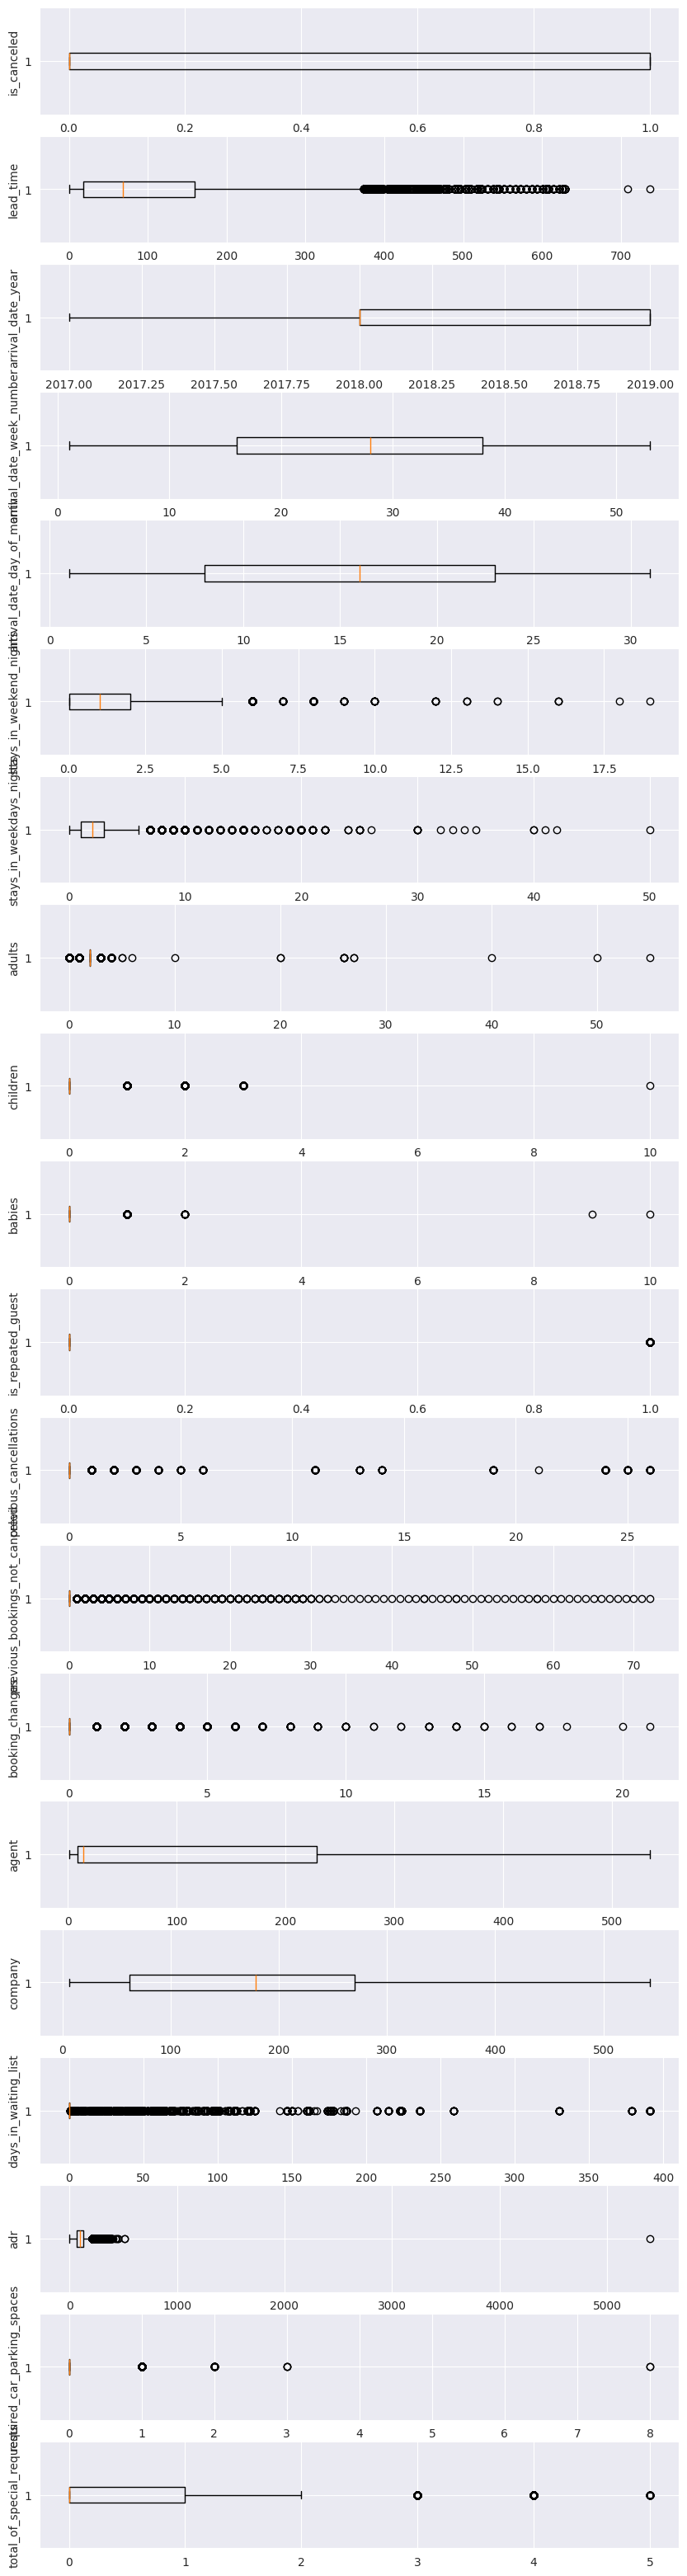

In [33]:
# Cek outliers
fig, axs = plt.subplots(len(nums), figsize=(10, len(nums)*2))

for i, col in enumerate(nums):
  axs[i].boxplot(df[col].dropna(), vert=False)
  axs[i].set_ylabel(col)

# plt.tight_layout()

plt.show()

## 1.2 Univariate Analysis